In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt
inner_shp_files = "innershpfiles/"
nepal_boundary = gpd.read_file(inner_shp_files)
nepal_boundary = nepal_boundary.dissolve(by='DISTRICT').reset_index()
school_df = pd.read_csv('total-number-of-schools-and-students-by-local-level-in-2074-bs.csv')
print(school_df.head())
school_df['Total no of Students of All Types Schools (Grade 1-12) Girls'] = school_df['Total no of Students of All Types Schools (Grade 1-12) Girls'].astype(int)
school_df['Area sq.km.'] = school_df['Area sq.km.'].str.replace('[^\d.]', '', regex=True)
school_df['Area sq.km.'] = school_df['Area sq.km.'].astype(float)
district_df = school_df.groupby('District')['Total no of Students of All Types Schools (Grade 1-12) Girls'].sum().reset_index()
nepal_boundary.rename(columns={'DISTRICT': 'District'}, inplace=True)
nepal_boundary['District'] = nepal_boundary['District'].str.lower().str.strip()
district_df['District'] = district_df['District'].str.lower().str.strip()


# Use the join method to join the GeoDataFrame and DataFrame based on the index
joined_gdf = nepal_boundary.merge(district_df[['District', 'Total no of Students of All Types Schools (Grade 1-12) Girls']], how='inner', on='District')

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Choose a colormap (cmap) according to your preferences
joined_gdf.plot(ax=ax,column='Total no of Students of All Types Schools (Grade 1-12) Girls', cmap='jet', legend=True)
print(joined_gdf.head())

plt.title('Geospatial Plot of GeoDataFrame')
plt.show()



: 

        DISTRICT                                           geometry  \
0         ACHHAM  POLYGON ((81.25290 29.04538, 81.25329 29.04535...   
1   ARGHAKHANCHI  POLYGON ((83.00481 27.92912, 83.00494 27.92935...   
2        BAGLUNG  MULTIPOLYGON (((83.56603 28.31630, 83.56608 28...   
3        BAITADI  POLYGON ((80.36966 29.34990, 80.36947 29.34978...   
4        BAJHANG  POLYGON ((81.12706 29.50160, 81.12780 29.50180...   
..           ...                                                ...   
72       SYANGJA  POLYGON ((83.85601 27.97210, 83.85678 27.97167...   
73        TANAHU  POLYGON ((84.42455 27.95584, 84.42485 27.95561...   
74     TAPLEJUNG  POLYGON ((87.78371 27.35559, 87.78278 27.35732...   
75     TERHATHUM  POLYGON ((87.51631 27.08957, 87.51580 27.08955...   
76      UDAYAPUR  POLYGON ((86.55338 26.78603, 86.55304 26.78480...   

    Total no of Schools  
0                    29  
1                    69  
2                    68  
3                    59  
4                

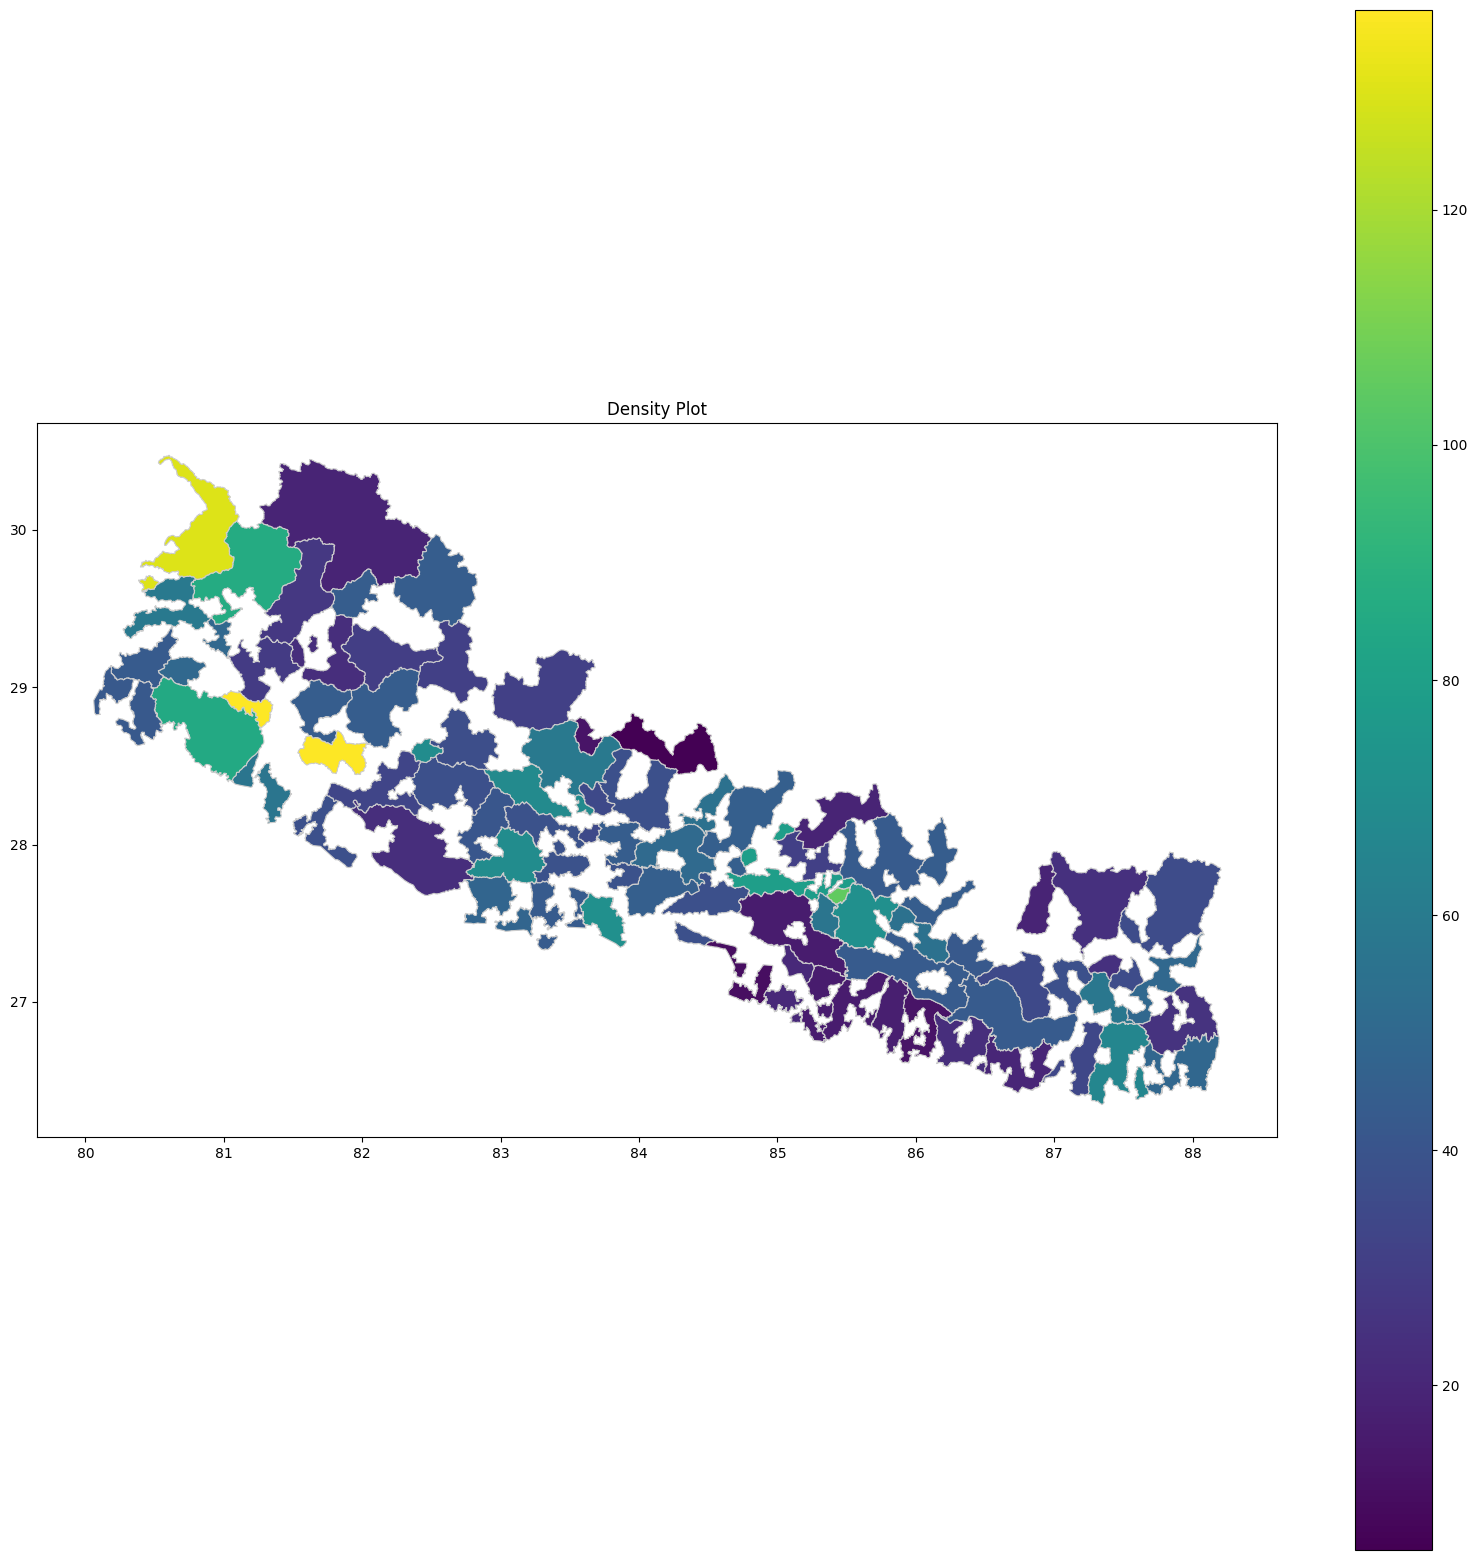

In [16]:

agg_gdf = district_gdf.groupby('DISTRICT').agg({
    'geometry': 'first',  # Preserve the first geometry (assuming it's the same within a district)
    'Total no of Schools': 'sum', # Sum the 'Hospital Count' column (optional, add more columns as needed)
}).reset_index()
print(agg_gdf)
crs = 'EPSG:4326'
district_gdf = gpd.GeoDataFrame(agg_gdf, geometry='geometry', crs=crs)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Choose the colormap (e.g., 'jet')
cmap = 'viridis'

# Plot the GeoDataFrame
district_gdf.plot(column='Total no of Schools', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Set title and show the plot
plt.title('Density Plot')
plt.savefig('school.png')
plt.show()

# Dissolve the aggregated GeoDataFrame based on 'district'




In [59]:
import tabula
print('hello')
import tabula

# Replace 'path/to/your/pdf_file.pdf' with the actual path to your PDF file
pdf_file_path = 'school_pdf.pdf'

# Read the PDF file and extract tables
tables = tabula.read_pdf(pdf_file_path, pages='all', multiple_tables=True)

# Assuming the table of interest is the first one (you may need to adjust accordingly)
school_df = tables[0]

# Save the DataFrame to a CSV file
csv_file_path = 'school.csv'
school_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved at: {csv_file_path}")

hello


JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.